In [121]:
### Código do caso do Titanic
### Titanic: Machine Learning from Disaster
### Dados fornecidos da plataforma Kaggle
### https://www.kaggle.com/c/titanic

In [122]:
import sys
!{sys.executable} -m pip install --upgrade pandas

# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignorar warnings:
import warnings
warnings.filterwarnings('ignore')

# Importar imagens
from IPython.display import Image

# Bibliotecas Machine Learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Requirement already up-to-date: pandas in d:\anaconda3\lib\site-packages (1.0.4)


In [123]:
# Lendo arquivos de treino e de teste
## O objetivo é avaliar através do modelo que vai ser criado o que aconteceu com as pessoas desaparecidas

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [124]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [125]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [126]:
# Copiando os arquivos para não alterar os originais
train_copy = train.copy()
test_copy = test.copy()

In [127]:
# Verificando tipos dos dados dos conjuntos de treino e teste
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
### Verificando quantidade de valores nulos conjunto de treino e de teste

In [129]:
total = train_copy.isnull().sum().sort_values(ascending=False).head(10)
percent_1 = train_copy.isnull().sum()/train_copy.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687.0,77.1
Age,177.0,19.9
Embarked,2.0,0.2
Fare,0.0,0.0
Ticket,0.0,0.0


In [130]:
total = test_copy.isnull().sum().sort_values(ascending=False).head(10)
percent_1 = test_copy.isnull().sum()/test_copy.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327.0,78.2
Age,86.0,20.6
Fare,1.0,0.2
Embarked,0.0,0.0
Ticket,0.0,0.0


In [131]:
### As colunas Age e Cabin apresentam quantidade grande de valores nulo

In [132]:
# Preenchendo os valores nulos 

#train_copy['Age'].fillna(train_copy['Age'].mean(),inplace=True)

In [133]:
#test_copy['Age'].fillna(test_copy['Age'].mean(),inplace=True)

In [134]:
train_copy.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [135]:
test_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
train_copy.isnull().sum().sort_values(ascending=False).head(10)

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64

In [137]:
## Analisando variáveis envolvidas no desastre

### Quantidade de homens e mulheres
train_copy["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [138]:
### Classe em que viajaram

train_copy['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

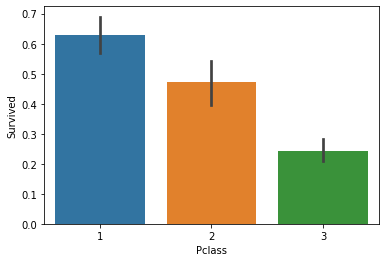

In [139]:
## Gráfico de barras mostrando a quantidade de pessoas mortas de acordo com a classe (1ª,2ª ou 3ª)
## É possível se ver que as pessoas da primeira e segunda classe tiveram prioridade nos salvamentos

sns.barplot(x="Pclass",y="Survived", data=train_copy);

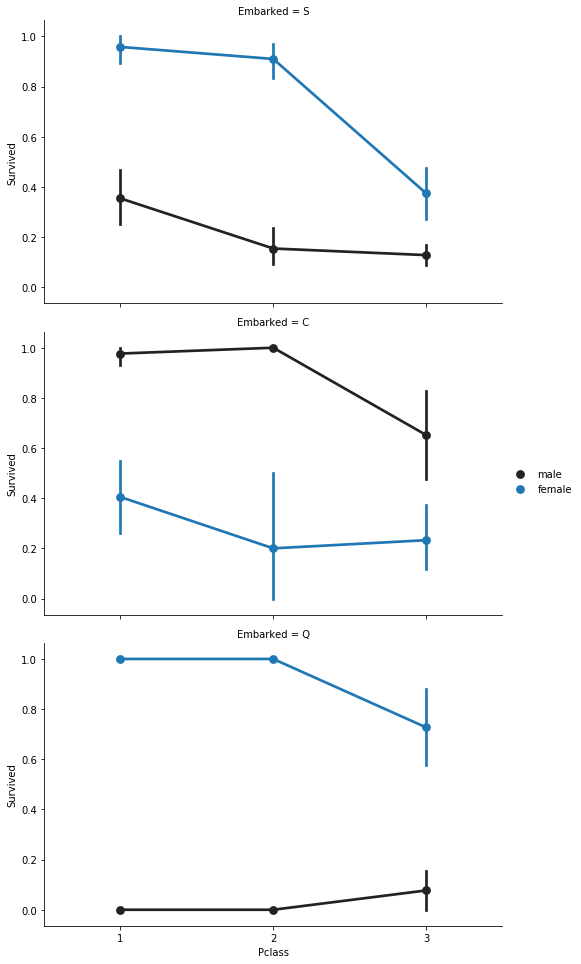

In [140]:
# Sobreviventes em função da porta de entrada e classe

FacetGrid = sns.FacetGrid(train_copy, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

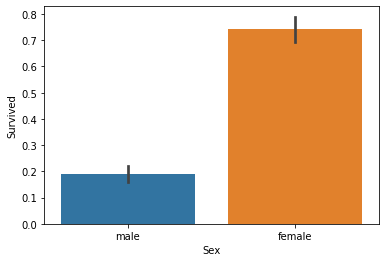

In [141]:
## Como já é sabido no navio as mulheres e crianças tinham prioridade de serem salvas
## É possível enxergar isso no gráfico de barras

sns.barplot(x="Sex",y="Survived", data=train_copy);

80.0

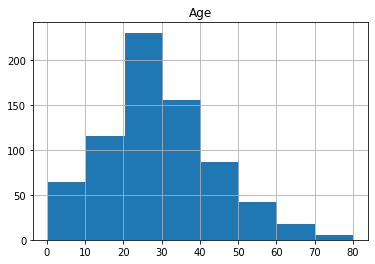

In [142]:
## Faixa etária dos passageiros do navio
# - Mais de 400 pessoas entre 20 e 30 anos (quase metade)

# Idade máxima dentro do navio 
display(train_copy['Age'].max())

train_copy.hist(column='Age',bins=8)
plt.show()

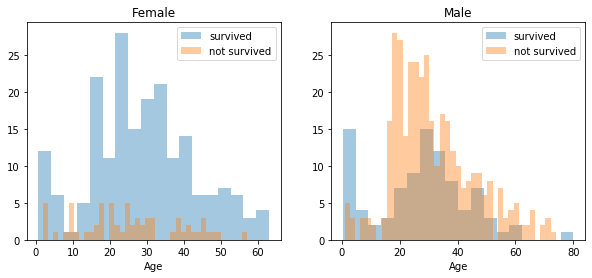

In [143]:
# Probabilidade de sobrevivência

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_copy[train_copy['Sex']=='female']
men = train_copy[train_copy['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

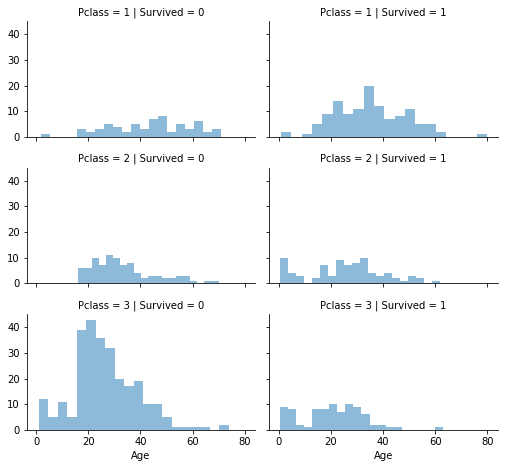

In [144]:
# Alta índice de sobrevivência dos passageiros da classe 1 e baixo na classe 3
## Os gráficos mostram a distribuição por idade

grid = sns.FacetGrid(train_copy, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

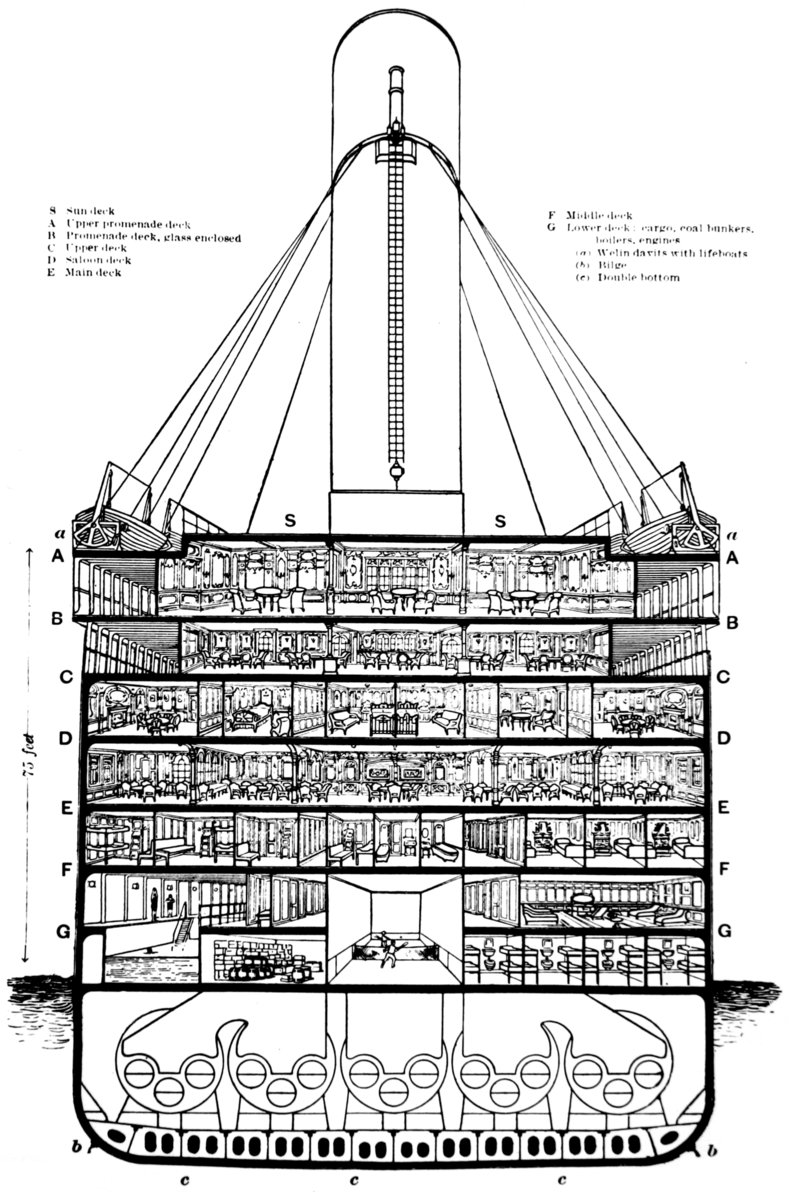

In [145]:
# Os decks vão de A a G, existiam pessoas no deck, com isso não é válido deletar a variável cabin
Image(filename="Titanic_decks.png",width=400,height=600)

In [146]:
data = [train_copy, test_copy]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_copy['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

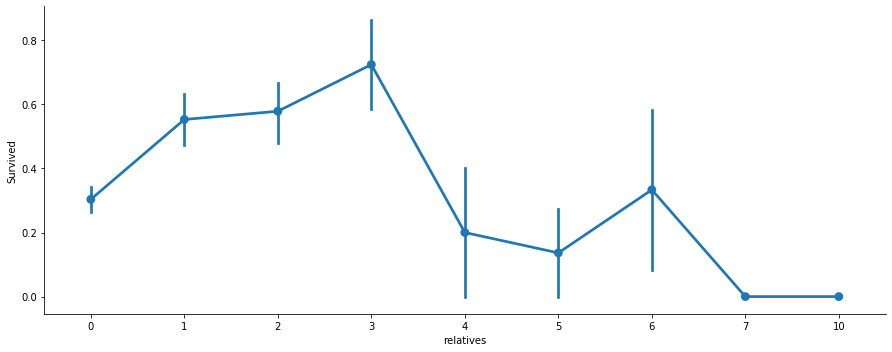

In [147]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_copy, aspect = 2.5, )

In [148]:
train_copy = train_copy.drop(['PassengerId'], axis=1)

In [149]:
## Convertendo cabin para valores numéricos através da criação da coluna deck e posteriormente removendo cabin

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_copy, test_copy]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# Dropando a coluna cabin
train_copy = train_copy.drop(['Cabin'], axis=1)
test_copy = test_copy.drop(['Cabin'], axis=1)

In [150]:
train_copy.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,0,8


In [151]:
# Criando uma matriz que contém números aleatórios, que são calculados com base no valor médio da idade 
## em relação ao desvio padrão e is_null.

data = [train_copy, test_copy]

for dataset in data:
    mean = train_copy["Age"].mean()
    std = test_copy["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # Computa números aleatórios entre a média, desvio padrão e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # Preenchendo valores NaN na coluna idade com valores gerados aleatoriament
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_copy["Age"].astype(int)
    train_copy["Age"].isnull().sum()

In [152]:
# Como a coluna embarked possui apenas dois valores faltantes, serão substituídos pelo mais comum 

common_value = 'S'
data = [train_copy, test_copy]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [153]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [154]:
# Convertendo fare de float para int

data = [train_copy, test_copy]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [155]:
# Utilizando o "Name" para extrair os títulos dos nomes dos passageiros, com isso é possível criar um 
## novo recurso a partir dele.

data = [train_copy, test_copy]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_copy = train_copy.drop(['Name'], axis=1)
test_copy = test_copy.drop(['Name'], axis=1)

In [156]:
# Convertendo "Sex" para variáveis numéricas

genders = {"male": 0, "female": 1}
data = [train_copy, test_copy]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [157]:
# Dropando tickets

train_copy = train_copy.drop(['Ticket'], axis=1)
test_copy = test_copy.drop(['Ticket'], axis=1)

In [158]:
# Convertendo "Embarked" para variável numérica

ports = {"S": 0, "C": 1, "Q": 2}
data = [train_copy, test_copy]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [159]:
# Categorizando por idade

data = [train_copy, test_copy]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    
train_copy['Age'].value_counts()

4    161
6    160
5    150
3    137
2    118
1     97
0     68
Name: Age, dtype: int64

In [160]:
train_copy.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [161]:
data = [train_copy, test_copy]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [162]:
## Novas colunas

data = [train_copy, test_copy]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [163]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_copy.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


In [164]:
### Construindo modelo de Machine learning

In [165]:
X_train = train_copy.drop("Survived", axis=1)
Y_train = train_copy["Survived"]
X_test  = test_copy.drop("PassengerId", axis=1).copy()

In [166]:
## Stochastic Gradient Descent (SGD)

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [167]:
## Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [168]:
## Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [169]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [170]:
# Gaussian Naive Bayes

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [171]:
# Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [172]:
# Linear Support Vector Machine

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [173]:
# Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [174]:
# Linear Support Vector Machine

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [175]:
# Comparativo de diferentes modelos

results = pd.DataFrame({
    'Model': ['Stochastic Gradient Descent', 'Random Forest', 'Logistic Regression', 
              'KNN', 'Naive Bayes', 'Perceptron', 'Decision Tree','Linear Support Vector Machine'],
    'Score': [acc_sgd, acc_random_forest, acc_log, acc_knn, acc_gaussian, acc_perceptron, acc_decision_tree,acc_linear_svc]})
result = results.sort_values(by='Score', ascending=False)
result = result.set_index('Score')
display(result.head(9))

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
86.64,KNN
81.71,Logistic Regression
80.81,Perceptron
80.58,Stochastic Gradient Descent
80.58,Linear Support Vector Machine
78.68,Naive Bayes
